<a href="https://colab.research.google.com/github/Liza-IITP/MachineLearning/blob/main/placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧠 Problem Statement: Predicting College Student Placement Outcomes**
In today’s competitive academic and employment landscape, understanding the factors that influence a college student’s placement success is crucial for educational institutions, career counselors, and students themselves. Given a synthetic dataset simulating academic, personal, and professional attributes of 10,000 college students, our goal is to develop a predictive model that can accurately classify whether a student will be placed or not placed in campus recruitment.

This project involves building a binary classification model to predict the placement outcome using features such as:


*  Academic indicators like IQ, CGPA, and semester results
*  Skill-based attributes like communication skills, number of projects, and extracurricular involvement
* Professional experience such as internships


The final target variable is:\
**Placement**: Whether the student was placed (Yes) or not placed (No)

---




In [1]:
# IMPORTING DATASET
import pandas as pd
file = pd.read_csv("/content/college_student_placement_dataset.csv")
print(file.head())
print(file.info())


  College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                    No                       8                     8   
1                    No                       7                     8   
2                    No                       3                     1   
3                   Yes                       1                     6   
4                    No                       8                    10   

   Projects_Completed Placement  
0                   4        No  
1                   0        No  
2                   1        No  
3                   1       

In [2]:
# College_ID not needed
file.drop(columns=['College_ID'], inplace=True)
# Check for missing values
print("Missing values:\n", file.isnull().sum())
# Check for duplicate rows
duplicates = file.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
file.drop_duplicates(inplace=True)

Missing values:
 IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64
Number of duplicate rows: 0


In [3]:
# Convert 'Yes'/'No' to 1/0 in Internship_Experience and Placement columns
file['Internship_Experience'] = file['Internship_Experience'].map({'Yes': 1, 'No': 0})
file['Placement'] = file['Placement'].map({'Yes': 1, 'No': 0})

In [4]:
from sklearn.preprocessing import StandardScaler
scale_cols = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
              'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']
scaler = StandardScaler()
file[scale_cols] = scaler.fit_transform(file[scale_cols])

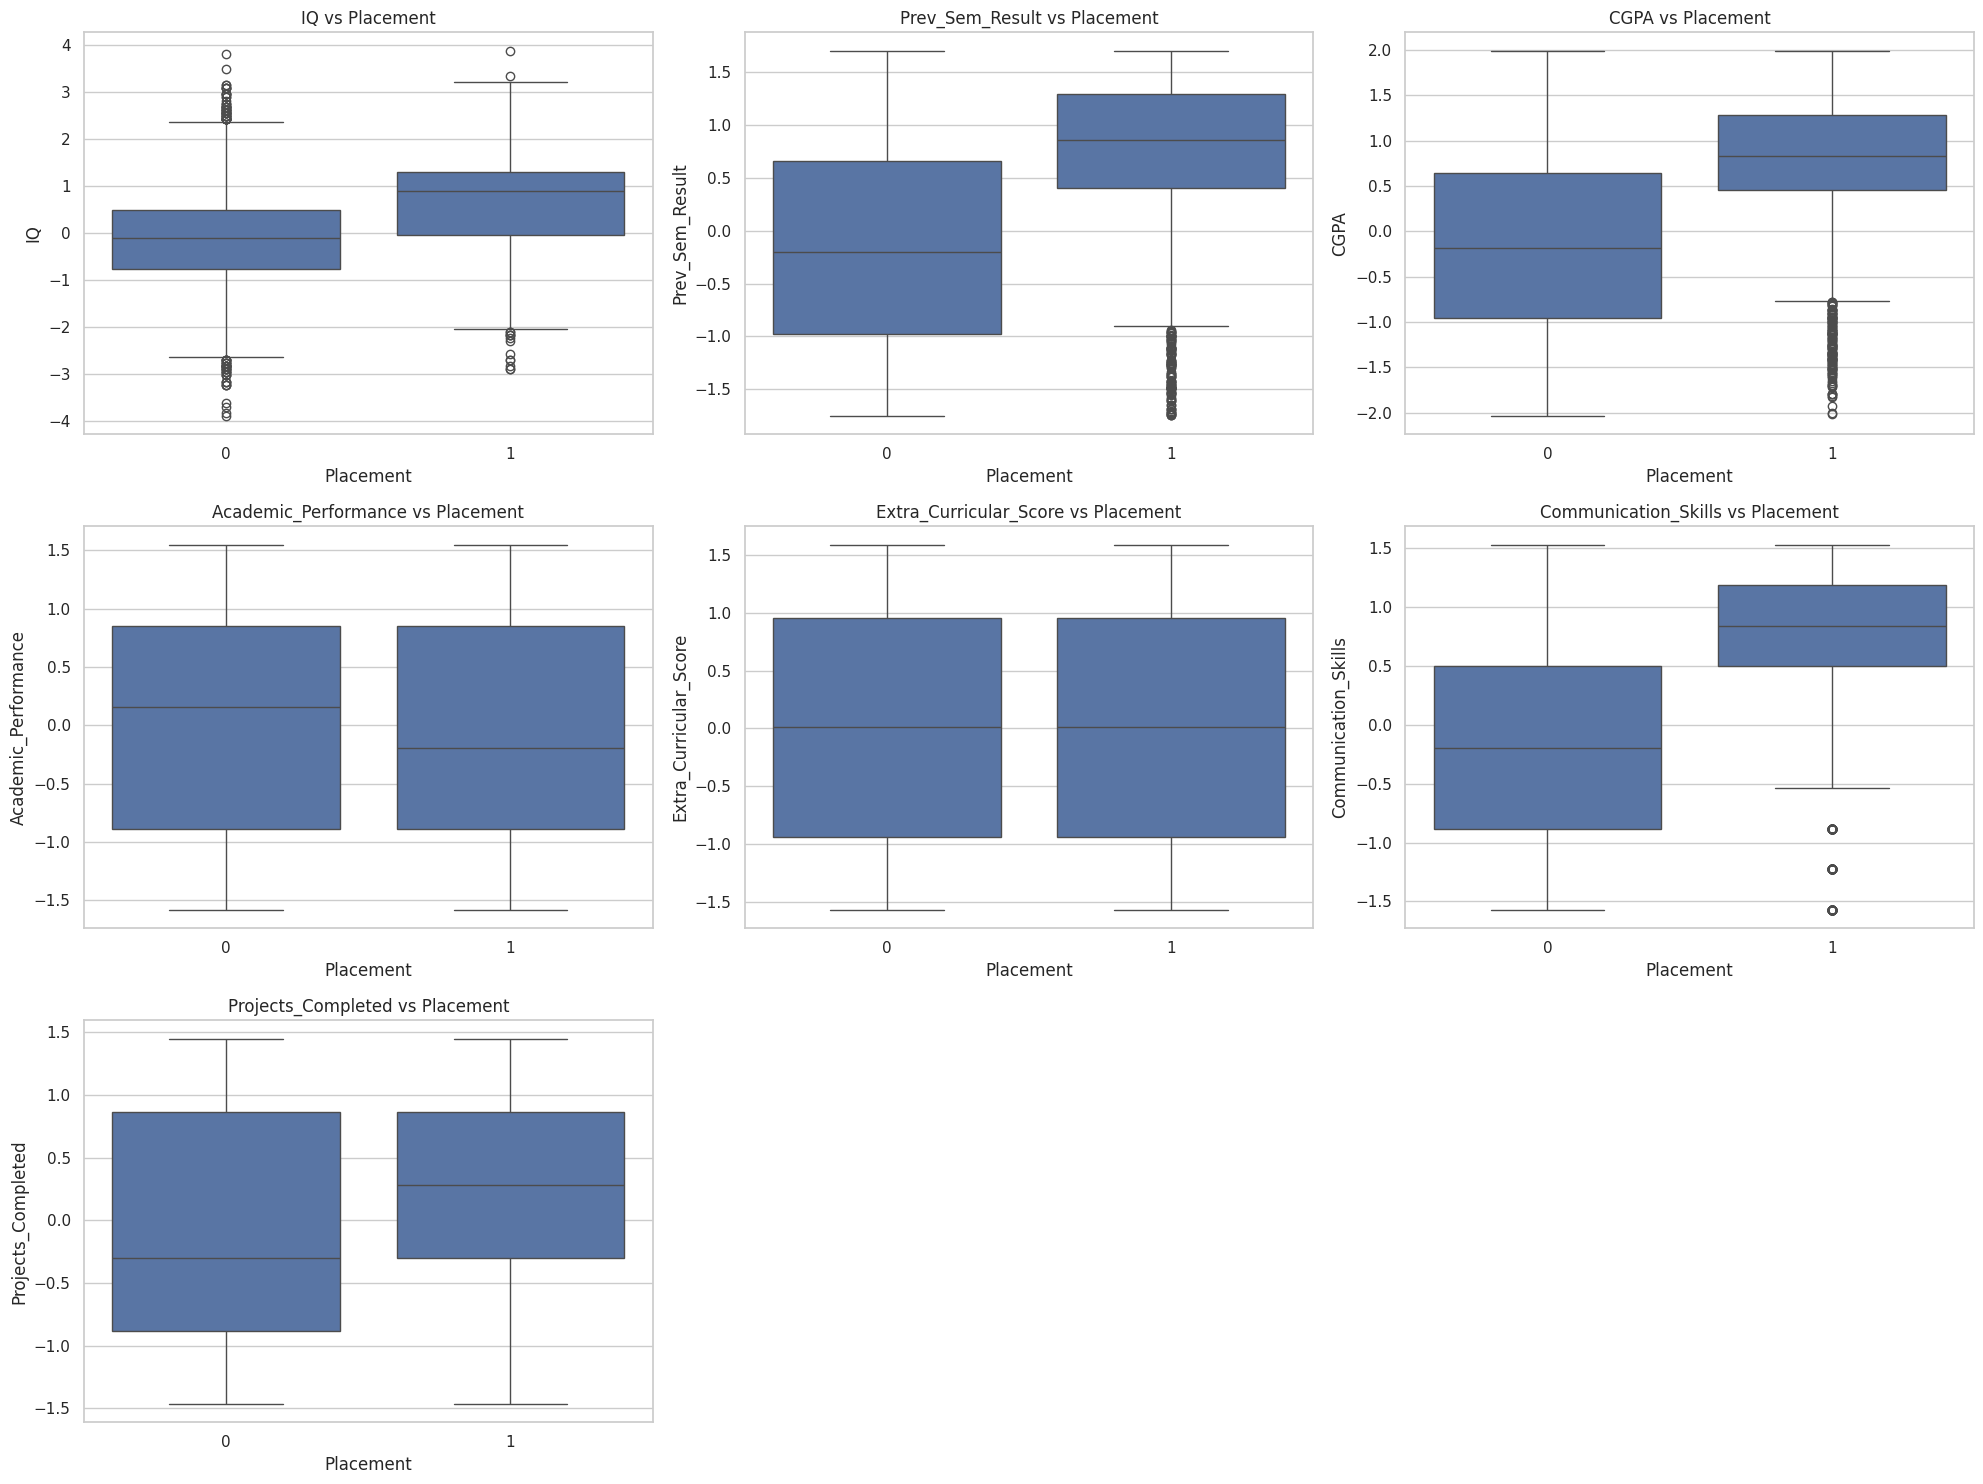

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
for idx, column in enumerate(scale_cols, 1):
    plt.subplot(3, 3, idx)
    sns.boxplot(x='Placement', y=column, data=file)
    plt.title(f'{column} vs Placement')
    plt.tight_layout()

plt.show()

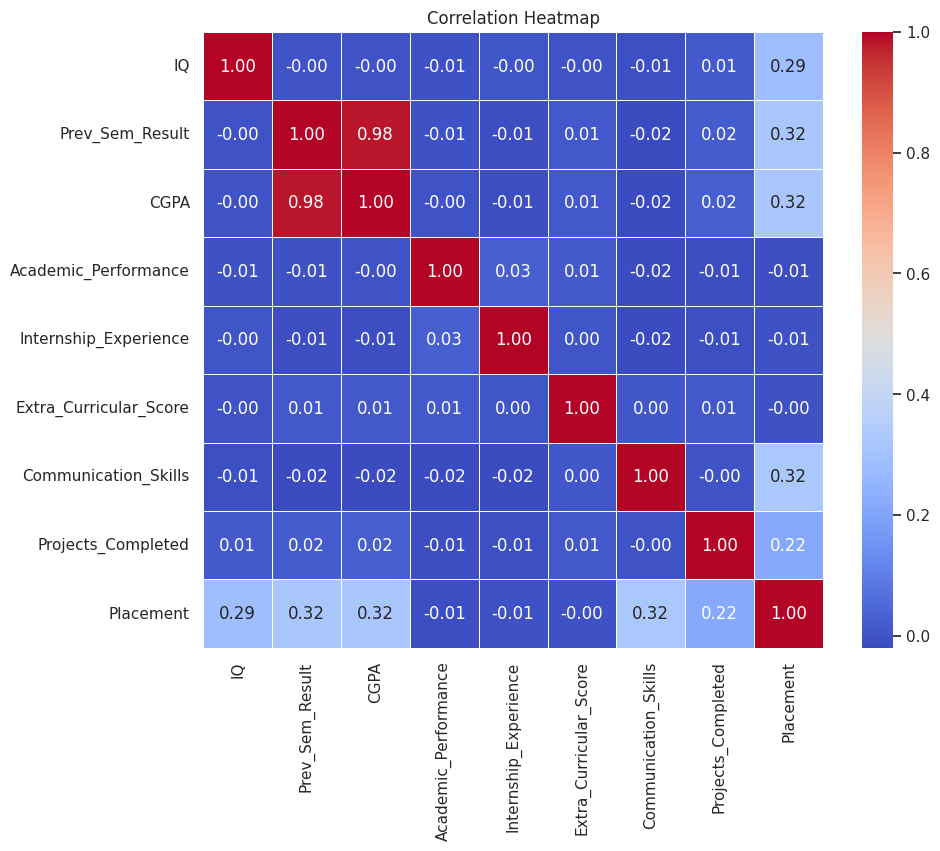

In [6]:
corr_matrix = file.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

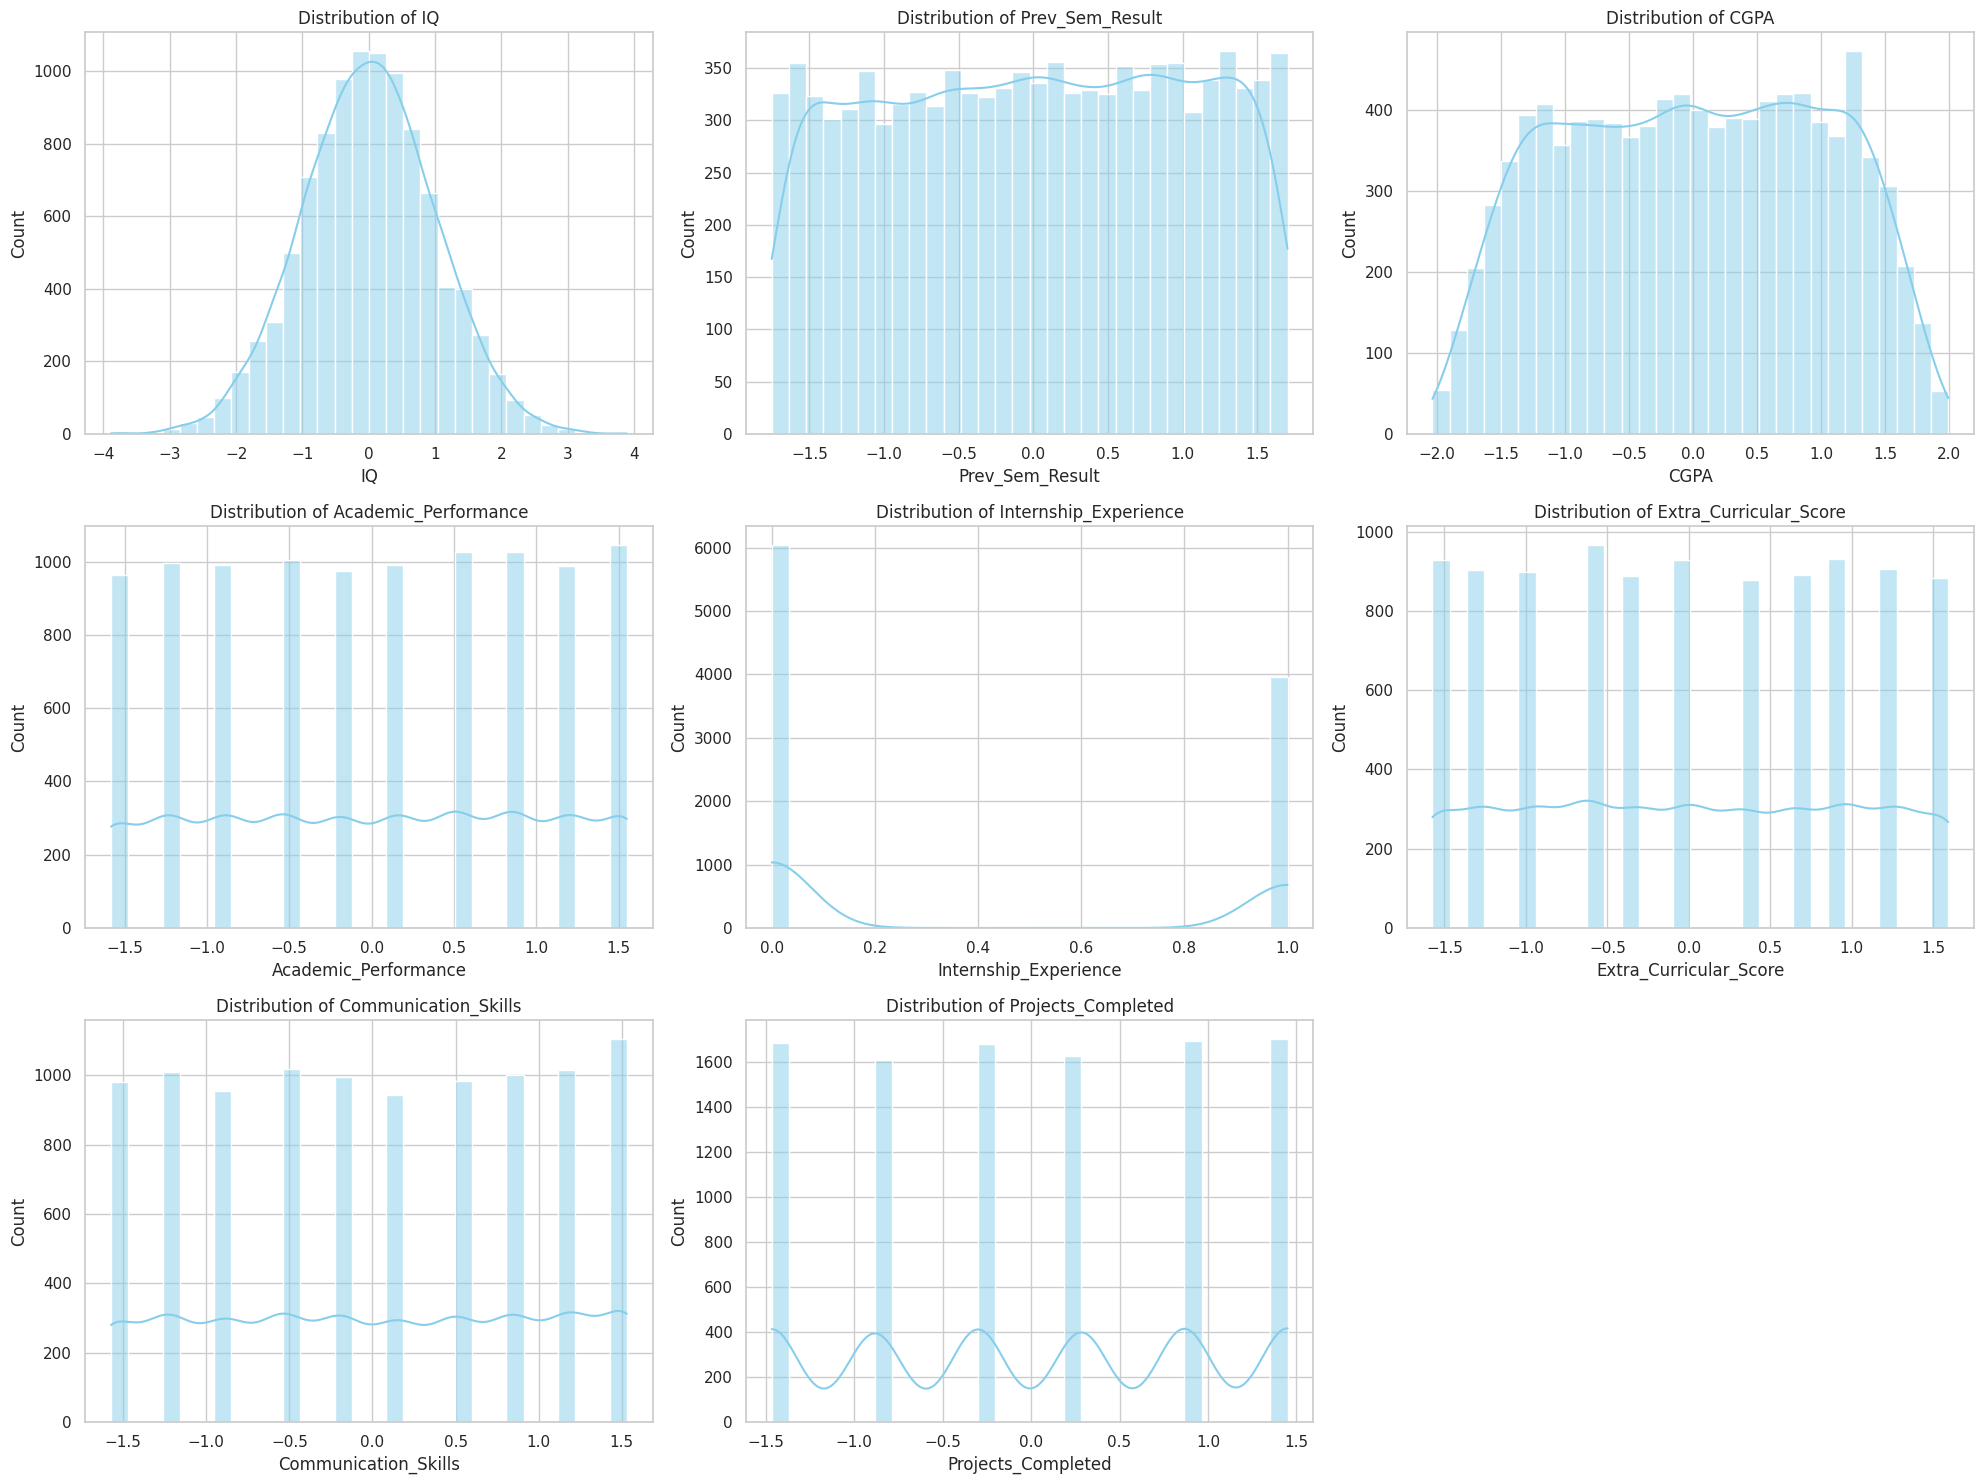

In [7]:
plt.figure(figsize=(20, 15))
for idx, column in enumerate(file.columns[:-1], 1):
    plt.subplot(3, 3, idx)
    sns.histplot(file[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data
X = file.drop('Placement', axis=1)
y = file['Placement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Logistic Regression with class_weight='balanced'
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with class_weight
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_rf_pred = rf_model.predict(X_test)

# Evaluation
print("\n[Random Forest Results]")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))
print("\nClassification Report:\n", classification_report(y_test, y_rf_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_rf_pred))


Confusion Matrix:
 [[2134  377]
 [  64  425]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      2511
           1       0.53      0.87      0.66       489

    accuracy                           0.85      3000
   macro avg       0.75      0.86      0.78      3000
weighted avg       0.90      0.85      0.87      3000


Accuracy Score: 0.853

[Random Forest Results]
Confusion Matrix:
 [[2511    0]
 [   1  488]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       489

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Accuracy Score: 0.9996666666666667


Placement Class Distribution:
 Placement
0    8341
1    1659
Name: count, dtype: int64


/tmp/ipython-input-9-1325795946.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Placement', data=file, palette='Set2')


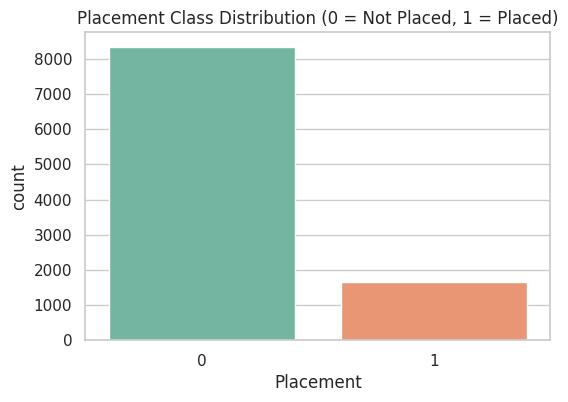

In [9]:
placement_counts = file['Placement'].value_counts()
print("Placement Class Distribution:\n", placement_counts)
plt.figure(figsize=(6, 4))
sns.countplot(x='Placement', data=file, palette='Set2')
plt.title('Placement Class Distribution (0 = Not Placed, 1 = Placed)')
plt.show()

/tmp/ipython-input-10-4169795847.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


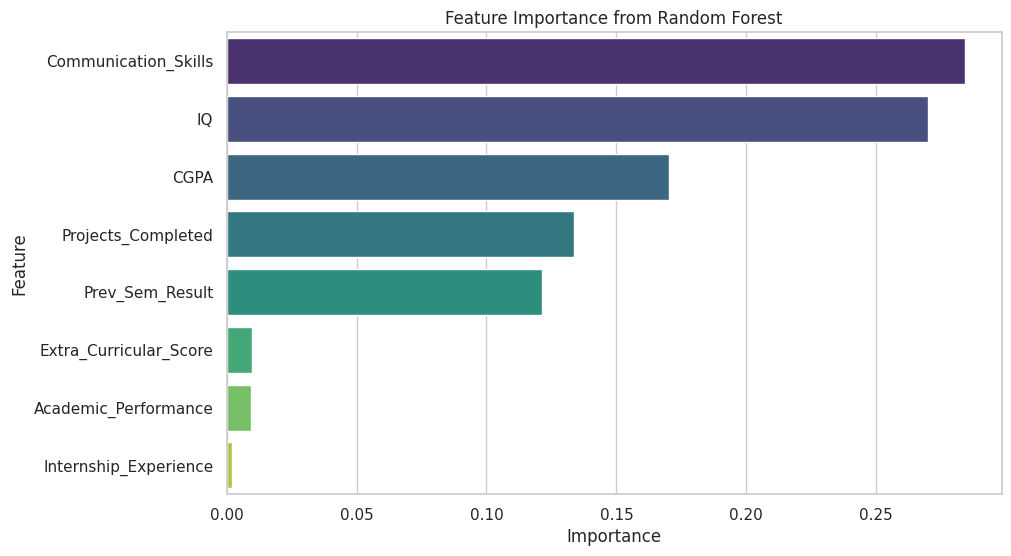

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.show()


In [11]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.9995 1.     1.     1.     0.9995]
Mean CV accuracy: 0.9998000000000001


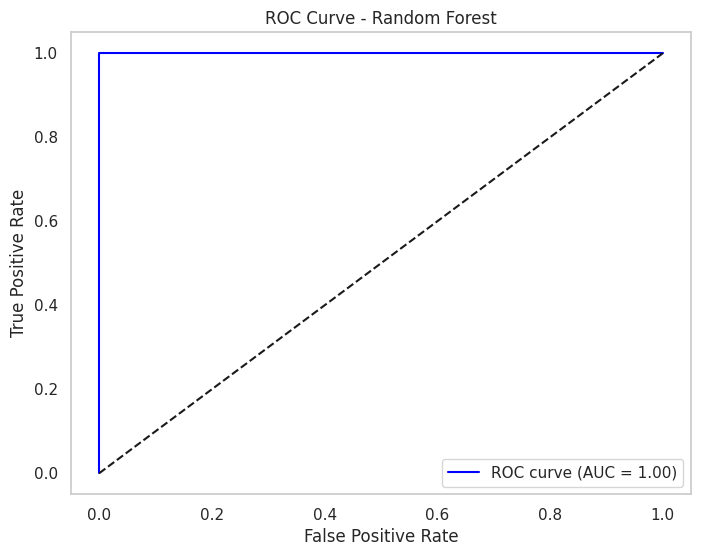

In [12]:
from sklearn.metrics import roc_curve, auc
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

for col in X.columns:
    lr = LogisticRegression()
    lr.fit(X[[col]], y)
    y_pred = lr.predict(X[[col]])
    auc = roc_auc_score(y, y_pred)
    print(f'{col} - AUC: {auc:.4f}')

IQ - AUC: 0.5103
Prev_Sem_Result - AUC: 0.5000
CGPA - AUC: 0.5019
Academic_Performance - AUC: 0.5000
Internship_Experience - AUC: 0.5000
Extra_Curricular_Score - AUC: 0.5000
Communication_Skills - AUC: 0.5000
Projects_Completed - AUC: 0.5000


/tmp/ipython-input-14-257862533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=file['IQ'], palette='coolwarm')


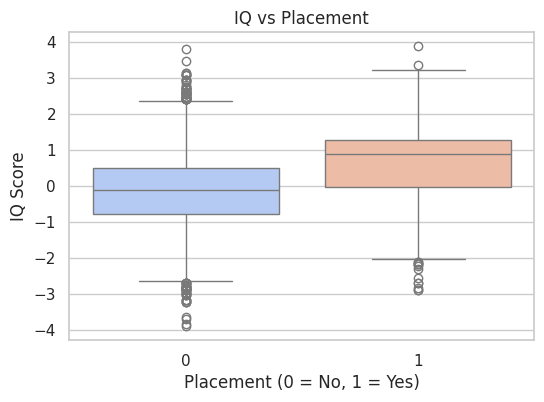

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x=y, y=file['IQ'], palette='coolwarm')
plt.title("IQ vs Placement")
plt.xlabel("Placement (0 = No, 1 = Yes)")
plt.ylabel("IQ Score")
plt.show()

In [15]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_dummy = dummy.predict(X_test)

print("Dummy Classifier Accuracy:", accuracy_score(y_test, y_dummy))
print("Classification Report (Dummy):\n", classification_report(y_test, y_dummy))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dummy Classifier Accuracy: 0.837
Classification Report (Dummy):
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2511
           1       0.00      0.00      0.00       489

    accuracy                           0.84      3000
   macro avg       0.42      0.50      0.46      3000
weighted avg       0.70      0.84      0.76      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
